In [1]:
#Standard
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
#Stats
from scipy import stats

In [3]:
#Plots
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import webbrowser                                                    
websites = 'http://en.wikipedia.org/wiki/Histogram'
webbrowser.open(websites)

True

In [5]:
dataset = randn(100)

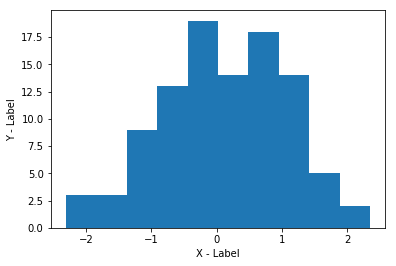

In [66]:
plt.hist(dataset)
plt.xlabel('X - Label')
plt.ylabel('Y - Label')
#plt.grid(True)
plt.show()

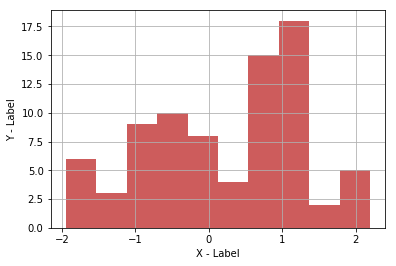

In [7]:
dataset2 = randn(80)
plt.hist(dataset2, color ='indianred')
plt.grid(True)
plt.xlabel('X - Label')
plt.ylabel('Y - Label')
plt.show()

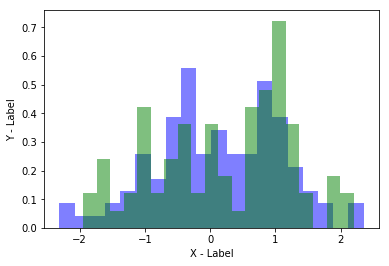

In [8]:
plt.hist(dataset, density = True, color = 'b', alpha = 0.5, bins = 20)
plt.hist(dataset2, density = True, color = 'g', alpha = 0.5, bins = 20)
plt.xlabel('X - Label')
plt.ylabel('Y - Label')
plt.show()

In [9]:
data1 = randn(1000)
data2 = randn(1000)

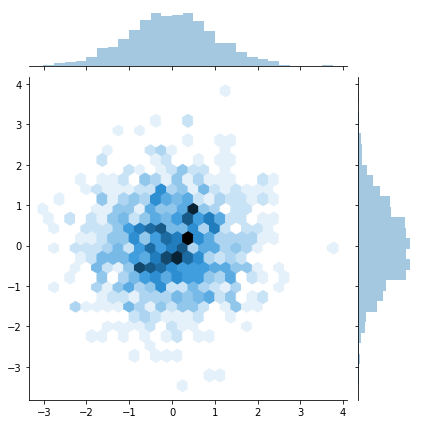

In [10]:
sns.jointplot(data1, data2, kind = 'hex')                                                                          

In [53]:
#Kernel Density Estimate Plots (KDE Plots)
website = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'
webbrowser.open(website)

True

In [12]:
data500 = randn(25)
data500

array([ 0.87772365,  0.25105208, -0.56434245,  0.0368344 ,  1.10575533,
        0.39026939, -0.4987774 ,  0.34575438, -0.82243027, -2.91799658,
       -1.31878223,  0.48225604,  1.49334149, -0.07173717,  1.49750842,
       -1.15596995, -0.49818654, -1.06866702,  0.25167039,  0.44828013,
       -0.10353418,  0.5374871 ,  0.09865096, -2.99999822, -0.25292769])

(0, 1)

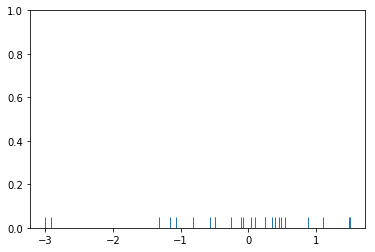

In [13]:
#Rug/Carpet plot
sns.rugplot(data500)
plt.ylim(0, 1)

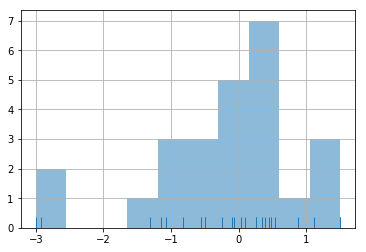

In [14]:
plt.hist(data500, alpha = 0.5)
sns.rugplot(data500)
plt.grid(True)
#Histogram sets up 10 bins and then counts how many ticks appeared in each bin,setting the height of each bar

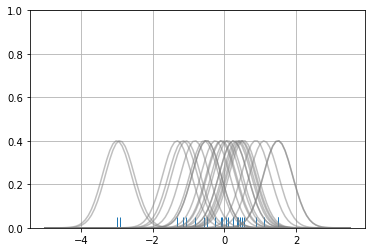

In [54]:
sns.rugplot(data500);

#Set up the x-axis for the plot
x_min = data500.min() - 2
x_max = data500.max() + 2

#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)                       #'np.linspace' creates equal-spaced intervals 

#Set up the bandwidth, for info on this:
import webbrowser
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
webbrowser.open(url)
#The bandwidth of the kernel is a free parameter which exhibits a strong influence on the resulting estimate

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2      #From estimation equation outlined in above article

#Create an empty kernel list
kernel_list = []

#Plot each basis function
for data in data500:
    
    #Create a kernel for each point and append to list
    kernel = stats.norm(data, bandwidth).pdf(x_axis)         #'pdf' = probability density function
    kernel_list.append(kernel)

#A probability density function (PDF), or density of a continuous random variable, is a function, whose 
#value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) 
#can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample


    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4                                    #Resizing
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)
plt.grid(True)
#plt.show()                                                  #'plt.show' is not required                              

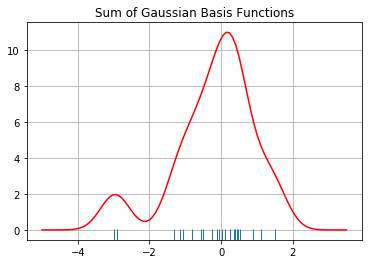

In [56]:
#To get the KDE plot, sum the basis functions

#METHOD 1
sum = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum, color = 'r')

sns.rugplot(data500)
plt.yticks()                                                                       #Removes all y tick-marks
plt.title('Sum of Gaussian Basis Functions')
plt.grid(True)

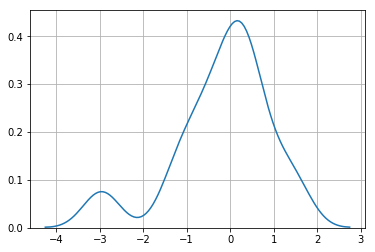

In [40]:
#METHOD 2
sns.kdeplot(data500)                                                   #Seaborn can construct a KDE in one line of code
plt.grid(True)

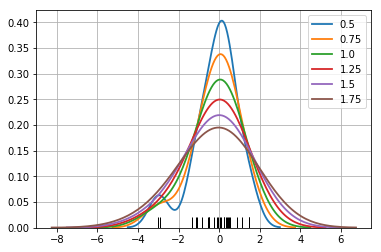

In [57]:
#Adjusting the bandwidth of the sns KDE to make the KDE plot more or less sensitive to high frequency
sns.rugplot(data500, color = 'black')

for bw in np.arange(0.5, 2, 0.25):                         #'bw' = bandwidth -> Identifying sensitivity at different bandwidths
    sns.kdeplot(data500, bw = bw, lw = 1.8, label = bw)
    
plt.grid(True)

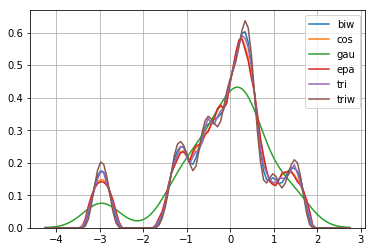

In [59]:
kernel_options = ['biw', 'cos', 'gau', 'epa', 'tri', 'triw']                  #Types of kernels

url2 = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'
webbrowser.open(url2)

for kern in kernel_options:
    sns.kdeplot(data500, kernel = kern, label = kern)
    plt.grid(True)

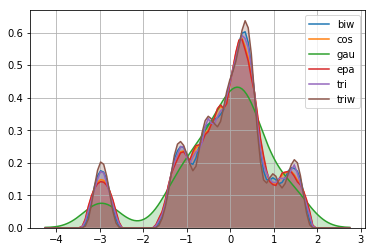

In [58]:
kernel_options = ['biw', 'cos', 'gau', 'epa', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(data500, kernel = kern, label = kern, shade = True)     #'shade' allows for overlap regions to be identified
    plt.grid(True)

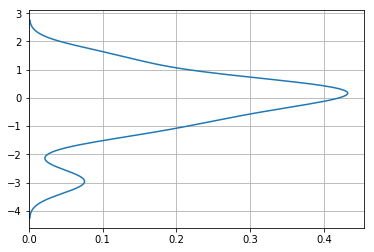

In [39]:
sns.kdeplot(data500, vertical = True)
plt.grid(True)

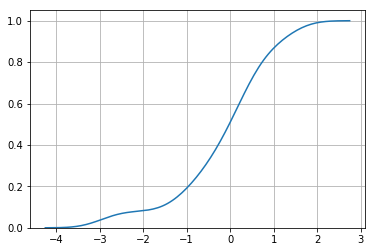

In [60]:
#Can also use KDE plot to create a cumulative distribution function (CDF) of the data

#Info on CDF
url3 = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'
webbrowser.open(url3)


#The cumulative distribution function (CDF, also cumulative density function) of a real-valued 
#random variable X, or just distribution function of X, evaluated at x, is the probability that X will 
#take a value less than or equal to x

sns.kdeplot(data500, cumulative = True)
plt.grid(True)

C:\Users\Naois\Downloads\Coding Software\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


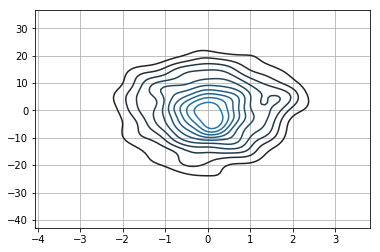

In [45]:
#Multidimensional Data


#Method 1

#Mean center of data
mean = (0,0)

#Diagonal covariance
co_variants = [[1, 0], [0, 100]]

data600 = np.random.multivariate_normal(mean, co_variants, 1000)

dframe = pd.DataFrame(data600, columns = ['X', 'Y'])

sns.kdeplot(data600)

plt.grid(True)

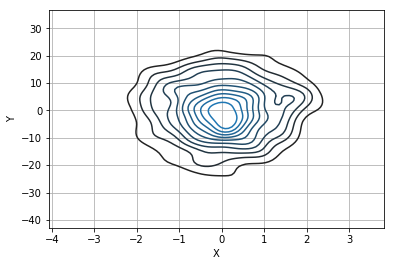

In [63]:
#Method 2
sns.kdeplot(dframe.X, dframe.Y)                         #Passing 2 vectors separately
plt.grid(True)

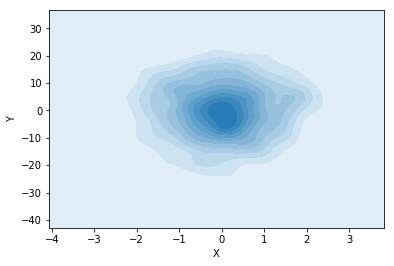

In [49]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

C:\Users\Naois\Downloads\Coding Software\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


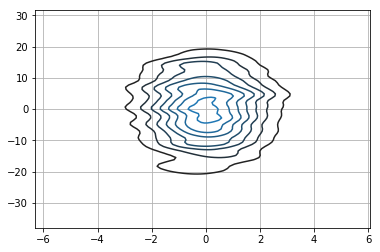

In [65]:
sns.kdeplot(dframe, bw = 1)                                  #Can specify a particular bandwidth
plt.grid(True)

C:\Users\Naois\Downloads\Coding Software\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


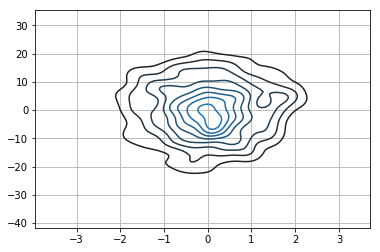

In [52]:
sns.kdeplot(dframe, bw = 'silverman')
plt.grid(True)

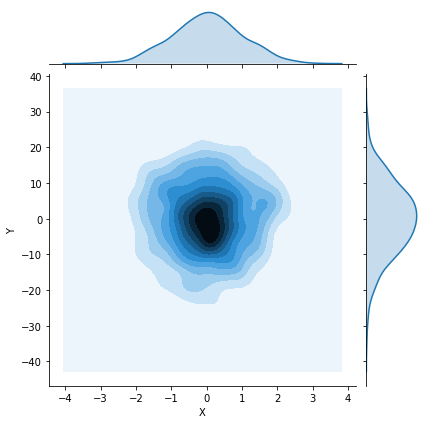

In [51]:
sns.jointplot('X', 'Y', dframe, kind = 'kde')                     #Creating a KDE joint plot